# String Art

Notebook to explore string art through programming.

Reference: Curve Stitching: Art of Sewing Beautiful Mathematical Patterns -- Jon Millington

## The Library

In [4]:
import numpy as np
from joy import *

In [5]:
N = 1
POINTS = []
LINES = []

def reset():
    global LINES, POINTS, N
    N = 1
    POINTS = []
    LINES = []

def make_circle(r=140, num_points=36):
    global POINTS, N
    N = num_points
    # subtract pi/2 to make the first point the bottom-most point instead of the right-most
    t = np.linspace(0, 2*np.pi, N, endpoint=False)-np.pi/2
    POINTS = list(zip(r*np.cos(t), r*np.sin(t)))
    
def connect(a, b):
    a = a % N
    b = b % N
    LINES.append((a, b))
    
def connect_all(n):
    """Connect every point to n points forward.
    """
    for i in range(N):
        connect(i, i+n)
        
def cross_connect(start=None, end=None):
    """Connect every point to every other point.
    
    If start is given as a list of indices, only those indices are used for starting points.
    If end is given as a list of indices only those indices are used for ending points.
    """
    start = start or range(N)
    end = end or range(N)
    for i in start:
        for j in end:
            if i != j:
                connect(i, j)
    
def draw():
    def draw_line(a, b):
        x1, y1 = POINTS[a]
        x2, y2 = POINTS[b]
        return line(x1=x1, y1=y1, x2=x2, y2=y2, stroke_width=0.5)
    
    points = [circle(x=x, y=y, r=2, fill="black") for x, y in POINTS]
    lines = [draw_line(a, b) for a, b in LINES]
    return Group(points+lines)
        

## Example

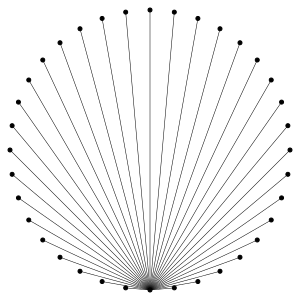

In [6]:
reset()
make_circle()

for i in range(N):
    connect(0, i)
    
draw()

## Chapter 3: Designs made from circles

### 1. Equal Chords

In [7]:
reset()
make_circle()

connect_all(15)

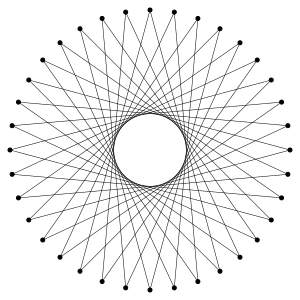

In [8]:
draw()

### 2. Two sets of equal chords

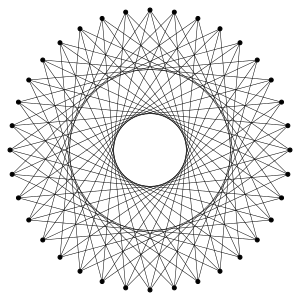

In [9]:
reset()
make_circle()

connect_all(11)
connect_all(15)
draw()

### 3. Nine point mystic rose

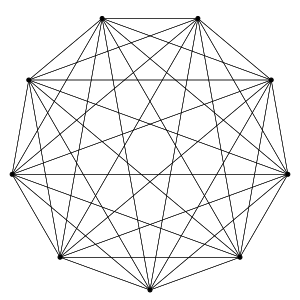

In [10]:
reset()
make_circle(num_points=9)
cross_connect()
draw()

### 4. Twelve point mystic rose

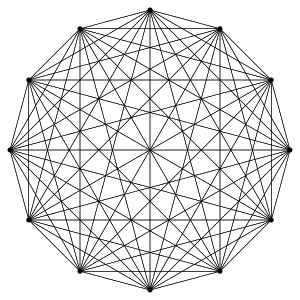

In [11]:
reset()
make_circle(num_points=12)
cross_connect()
draw()

### 5. An incomplete mystic rose

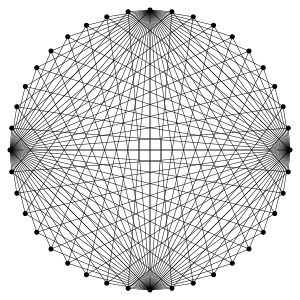

In [12]:
reset()
make_circle(num_points=40)
cross_connect(start=[0, 10, 20, 30])
draw()

### 6. Sunrise

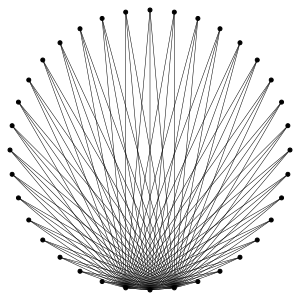

In [13]:
reset()
make_circle(num_points=36)
cross_connect(start=[-1,0, 1])
draw()